In [ ]:
import pandas as pd
from nltk.corpus import stopwords

df = pd.read_csv('./Dataset 11000 Reviews.tsv', sep="\t")
df.columns = [c.replace(' ', '_') for c in df.columns]

stopwords = set(stopwords.words('hinglish'))

x = df._ab_achanak_khawaja_saad_rafique_ko_khiyaal_aagaya_woh_bhe_peshawar_mai_is_line_pai_10_saal_sai_koi_train_nahe_guzri
y = df.neg

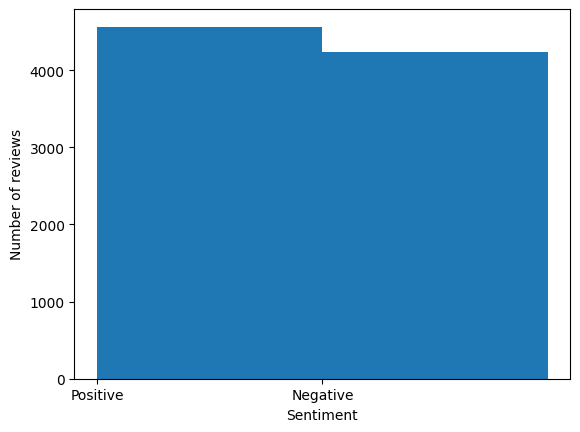

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=1234)

plt.hist(Y_train, bins=2)
plt.xlabel('Sentiment')
plt.ylabel('Number of reviews')
plt.xticks(['neg', 'pos'], ['Negative', 'Positive'])
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

# define the pipeline for Naive Bayes
nb_pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words=list(stopwords), binary=True)),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB())
])

# define the pipeline for Logistic Regression
lr_pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words=list(stopwords), binary=True)),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(solver='lbfgs', class_weight='balanced'))
])

# define the pipeline for Neural Networks
nn_pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words=list(stopwords), binary=True)),
    ('tfidf', TfidfTransformer()),
    ('clf', MLPClassifier())
])

# train the models
nb_pipeline.fit(X_train, Y_train)
lr_pipeline.fit(X_train, Y_train)
nn_pipeline.fit(X_train, Y_train)

# evaluate the models
nb_accuracy = nb_pipeline.score(X_test, Y_test)
lr_accuracy = lr_pipeline.score(X_test, Y_test)
nn_accuracy = nn_pipeline.score(X_test, Y_test)

print('Naive Bayes accuracy: %.3f' % nb_accuracy)
print('Logistic Regression accuracy: %.3f' % lr_accuracy)
print('Neural Networks accuracy: %.3f' % nn_accuracy)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['don', 'mon'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['don', 'mon'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['don', 'mon'] not in stop_words.
  warnings.warn(


Naive Bayes accuracy: 0.675
Logistic Regression accuracy: 0.784
Neural Networks accuracy: 0.759
